# Unit Analysis Practice

imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
#sampling rate of the recoridng
fs=30000


Load the unit data files - refer to phy for formatting of files

In [11]:
unit_IDs = np.load(file = 'spike_clusters.npy',mmap_mode= None)
spike_times = np.load(file = 'spike_times.npy',mmap_mode= None)
amplitudes  = np.load(file = 'amplitudes.npy',mmap_mode= None)
print(f'Size of unit ID array = {np.shape(unit_IDs)}')
print(f'Size of unit ID array = {np.shape(spike_times)}')
print(f'Size of unit ID array = {np.shape(unit_IDs)}')
print(f'Time of last spike: {max(spike_times) / fs} seconds or {max(spike_times) / fs/3600} hours')


Size of unit ID array = (23374679,)
Size of unit ID array = (23374679,)
Size of unit ID array = (23374679,)
Time of last spike: 74707.9636 seconds or 20.752212111111113 hours


Add each spike as (time,amp) tuple to a list(value) with a paired unit #(value) in dictionary

In [12]:
import time

units_dict = {}
#extract the number of "unique" spikes/units, the original indices in npy file, and the count of each
uniqueSpikeIDs,OriginalSpikeInds,spikeCounts = np.unique(ar = unit_IDs,return_inverse=True, return_counts=True)
#create keys for all of the units - keys are the unit #s
for u in range(0,len(uniqueSpikeIDs)):
    units_dict[uniqueSpikeIDs[u]] = []
#loop thru all spikes and their corresponding info --> assign each spike as tuple(t,amp) to a unit(key) in the dictionary
prog = 0 
total = len(unit_IDs)

for t,amp,u in zip(spike_times,amplitudes,unit_IDs):
    units_dict[u].append((t/fs*1000,amp))
    prog+=1
    if(prog % 5000000 == 0 and prog != 0):
        print(f"Progress: {prog/total*100}")
        end = time.time()
#sort the spikes based on time
for spikeList in units_dict.values():
    spikeList.sort(key = lambda x: x[0])
    spikeList = np.array(spikeList)



Progress: 21.390668081473972
Progress: 42.781336162947945
Progress: 64.17200424442193
Progress: 85.56267232589589


# Unit-Spike Analysis 

start with raster plots

In [34]:
from matplotlib.pyplot import eventplot

#need to bin the events, if spike occurrs within the time bin ---> assign a binary value of 1 to the binary array 
'''
Binary Array : 
size = (numUnits x numTimeBins)
numTimeBins = totalTime / timeResolution
timeResolution = 1 ms?
totalTime = 1000ms? 
timeOfSpike = sample / fs(30000)
'''
def plot_raster(unit_list,time_window,binsize,colors):

    '''
    ARGS: 

    units(list of ints)  : list of units to be plotted on the raster
    time_window(tuple of floats) :  tuple containing the start and end in milliseconds 
    binsize(float) : float containing the binsize to be used for the bianry raster in milliseconds

    '''

    '''DATA PREPROCESSING '''
    #create the binary raster matrix which will be plotted on the
    numBins = int(np.ceil((time_window[1] - time_window[0]) / binsize))
    raster_array = np.zeros((len(unit_list),(numBins)))
    #convert each spike list into binned binary 1s and 0s
    prog = 0 
    total = len(unit_list)
    for u in range(0,len(unit_list)):
        print(f"Progress = {prog/total*100}")
        #define the range of time for the currentbin
        #loop thru the time values
        for spike in units_dict[unit_list[u]]:
            if time_window[0] <= spike[0] < time_window[1]:
                            #calculate the bin # of this spike
                binNum = int(np.floor((spike[0] - time_window[0]) / binsize ))
                #assign 1 to the time bin where spike occurred
                raster_array[u][binNum] = 1
    
    fig, ax = plt.subplots()

    '''PLOTTING THE BINARY SPIKE ARRAY'''
    #loop over the units/trials
    for n in range(np.shape(raster_array)[0]):
        #create a list of the array indices for this unit(or trial) where a spike occurred(raster_array[n][s] == 1)
        times = [i for i,s in enumerate(raster_array[n]) if s == 1]
        #convert the indices(bins) into a meaningful time(ms)
        times = [i*binsize+time_window[0] for i in times]
        #plot the vlines for this unit(trial)
        ax.vlines(times,n - .25, n+.25)
    
    ax.set_xlim(time_window[0],time_window[1])
    ax.set_yticks(range(len(unit_list)))
    ax.set_ylim(-.5,len(unit_list))

    ax.set_xlabel('Time(ms)')
    ax.set_ylabel('Unit')
    ax.set_title('Spike Raster')

    

def plot_FR(units,time_window,binsize, mode):

    time_elapsed = time_window[1] - time_window[0]
    '''DATA PREPROCESSING
        - obtain the binned firing rate of units specified
            - loop thru all spikes occurring during the time window of interest'''

    FR_array = np.zeros(len(units),time_elapsed / binsize)
    #loop over the units specified 
    for u in units:
        #find the first occurrence of a spike within the desired range
        firstSpike = np.where(units_dict[u][0] >= time_window[0])
        #loop thru unit's spikes: start from the first spike in the time window, break upon reaching end of time_window
        for i in range(firstSpike,len(units_dict[u])):
            if(units_dict[u][i][0] >= time_window[1]):
                break
            binNum = np.floor((units_dict[u][i][0] - time_window[0]) / binsize)
            #add to tally of spikes within time bin for this unit(u)
            FR_array[u][binNum] += 1
    
    if mode == 'line':
        from matplotlib.pyplot import eventplot

#need to bin the events, if spike occurrs within the time bin ---> assign a binary value of 1 to the binary array 
'''
Binary Array : 
size = (numUnits x numTimeBins)
numTimeBins = totalTime / timeResolution
timeResolution = 1 ms?
totalTime = 1000ms? 
timeOfSpike = sample / fs(30000)
'''
def plot_raster(unit_list,time_window,binsize,colors_in,ax):

    '''
    ARGS: 

    units(list of ints)  : list of units to be plotted on the raster
    time_window(tuple of floats) :  tuple containing the start and end in milliseconds 
    binsize(float) : float containing the binsize to be used for the bianry raster in milliseconds

    '''

    '''DATA PREPROCESSING '''
    #create the binary raster matrix which will be plotted on the
    numBins = int(np.ceil((time_window[1] - time_window[0]) / binsize))
    raster_array = np.zeros((len(unit_list),(numBins)))
    #convert each spike list into binned binary 1s and 0s
    prog = 0 
    total = len(unit_list)
    for u in range(0,len(unit_list)):
        print(f"Progress = {prog/total*100}")
        #define the range of time for the currentbin
        #loop thru the time values
        for spike in units_dict[unit_list[u]]:
            if time_window[0] <= spike[0] < time_window[1]:
                            #calculate the bin # of this spike
                binNum = int(np.floor((spike[0] - time_window[0]) / binsize ))
                #assign 1 to the time bin where spike occurred
                raster_array[u][binNum] = 1
    
    if ax is None:
        _,ax = plt.subplots(1,1)

    '''PLOTTING THE BINARY SPIKE ARRAY'''
    #loop over the units/trials
    for n in range(np.shape(raster_array)[0]):
        #create a list of the array indices for this unit(or trial) where a spike occurred(raster_array[n][s] == 1)
        times = [i for i,s in enumerate(raster_array[n]) if s == 1]
        #convert the indices(bins) into a meaningful time(ms)
        times = [i*binsize+time_window[0] for i in times]
        #plot the vlines for this unit(trial)
        ax.vlines(times,n - .25, n+.25,colors = colors_in[n])
    
    ax.set_xlim(time_window[0],time_window[1])
    ax.set_yticks(range(len(unit_list)))
    ax.set_ylim(-.5,len(unit_list))

    ax.set_xlabel('Time(ms)')
    ax.set_ylabel('Unit')
    ax.set_title('Spike Raster')

    

def plot_FR(units_in,time_window,binsize, ax, colors):


    if ax is None: 
        _, ax = plt.subplots(1,1)

    time_elapsed = time_window[1] - time_window[0]
    '''DATA PREPROCESSING
        - obtain the binned firing rate of units specified
            - loop thru all spikes occurring during the time window of interest'''
    #check that the time window and binsize allow for integer milllisecond bins 
    if int(time_elapsed % binsize != 0):
        raise Exception("Time elapsed and binsize must be compatible such that the number of bins(time_elapsed mod binsize = 0) is an integer")
    FR_array = np.zeros((len(units_in),int(time_elapsed / binsize)))
    #loop over the units specified 
    for u in range(len(units_in)):
        spikeTimes = np.array([units_dict[units_in[u]][i][0] for i in range(len(units_dict[units_in[u]]))])
        #find the first occurrence of a spike within the desired range
        firstSpike = np.where(spikeTimes >= time_window[0])[0][0]
        #loop thru unit's spikes: start from the first spike in the time window, break upon reaching end of time_window
        for i in range(firstSpike,len(units_dict[units_in[u]])):
            if(units_dict[units_in[u]][i][0] >= time_window[1]):
                break
            binNum = np.floor((units_dict[units_in[u]][i][0] - time_window[0]) / binsize)
            #add to tally of spikes within time bin for this unit(u)
            FR_array[u][int(binNum)] += 1
    

    '''FIRING RATE PLOTTING'''
    t = np.linspace(time_window[0],time_window[1],np.shape(FR_array)[1])
    for i in range(len(units_in)):
        ax.plot(t,FR_array[i],color = colors[i])
    ax.set_ylabel('Firing Rate(spikes/s)')
    ax.set_xlabel('Time(ms)')


Progress = 0.0
Progress = 0.0
Progress = 0.0


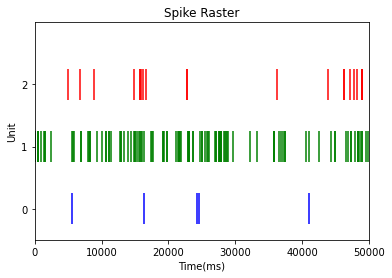

In [28]:
plot_raster(unit_list = [37,86,219],time_window = (0,50000),binsize = 0.5,colors_in = ['blue','green','red'])

In [23]:
plot_FR([37,86,219],time_window = (0,50000),binsize = 1000,colors = ['blue','green','red'])

TypeError: plot_FR() got an unexpected keyword argument 'mode'

Progress = 0.0
Progress = 0.0
Progress = 0.0


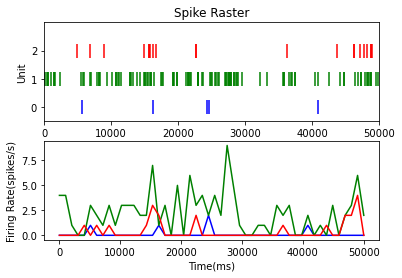

In [35]:
fig, ax = plt.subplots(2,1)

plot_raster(unit_list = [37,86,219],time_window = (0,50000),binsize = 0.5,colors_in = ['blue','green','red'], ax = ax[0])

plot_FR([37,86,219],time_window = (0,50000),binsize = 1000,colors = ['blue','green','red'], ax = ax[1])

